In [1]:
import pandas as pd
import datetime as dt
import re

import twint
import nest_asyncio

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer

import matplotlib.pyplot as plt

nest_asyncio.apply()
stopwords = list(stopwords.words('russian'))

#### Running tweets search for 'мцд' key word

In [1]:
t = twint.Config()
t.Search = 'мцд'
t.Store_Object = True
t.Limit = None
t.Since = "2015-01-01"
t.Pandas = True
twint.run.Search(t)

#### Putting tweets to pandas dataframe, subseting neccessary columns

In [16]:
mcd = twint.storage.panda.Tweets_df
mcd = mcd.loc[mcd.language == 'ru', ['id', 'date', 'tweet', 'username']]
mcd

,id,date,tweet,username
0,1338135572360073217,2020-12-13 17:55:56,Я ПОЕДУ НА МЦД ХАХА,detskeysad
1,1338118868456394755,2020-12-13 16:49:33,@immelethale Ну слова нужны... и синтаксисы ну...,onomato30034179
2,1338118288526741504,2020-12-13 16:47:15,"Одни из самых загадочных людей для меня - те, ...",VVPutin_Putout
3,1338089968279891970,2020-12-13 14:54:43,"Без шуток, в дни открытия МЦД видел там тётку,...",Georg275
4,1338085821300305920,2020-12-13 14:38:14,"Да благословит человека,который создал проект ...",raccoon4ik
...,...,...,...,...
50059,601647530783461376,2015-05-22 10:15:24,"Сегодня в 18:00, Никитина 70, арт-галерея Респ...",udobunsk
50061,573025290584125440,2015-03-04 10:40:50,Ученый совет ВНИИГМИ-МЦД подвел итоги деятельн...,ecosafetyru
50063,565908317403615232,2015-02-12 19:20:31,Целый день на переговорах #РНКЧЭС #РНК #ЧЭС #Ш...,SamirBinnatov
50064,565799202207592448,2015-02-12 12:06:56,Руководители РНК ЧЭС на переговорах в Московск...,SamirBinnatov


#### Pulling out only tweets with @ tags

In [17]:
to_match = ['@MosSobyanin', '@DtRoad', '@mosgortrans_ru', '@centralppk', '@rzd_official', '@MoscowMetro', '@MetroOperativno']

find_refs = []
for tw in mcd.tweet:
    
    tw = re.sub(',|;|:|-|\.', '', tw)
    tw = tw.split()
    
    find_refs.append(any([True if word in to_match else False for word in tw]))

mcd_refr = mcd[find_refs]

mcd_refr

,id,date,tweet,username
9,1337951627769225216,2020-12-13 05:45:00,@centralppk Надо на МЦД такой поезд пустить. ...,a_kosushkin
11,1337789516392828931,2020-12-12 19:00:50,@centralppk Почему в кассах диаметров нельзя п...,a_kosushkin
34,1337320839042183169,2020-12-11 11:58:28,"Как же я устал, что МЦД-2 работает стабильно п...",Melpy13
45,1337066303140540419,2020-12-10 19:07:02,@centralppk за час не остановилось ни одной эл...,MityaOst
52,1336948232748998656,2020-12-10 11:17:52,"🤦‍♂️ Хоспаде, как можно вообще додуматься, сра...",muycaminante
...,...,...,...,...
49636,942755678061563904,2017-12-18 16:57:23,@BillyNavigator @MosSobyanin Вы читали экономи...,the500th_
49643,942738964481433600,2017-12-18 15:50:59,@Genn4ik @sosmosmetro @MosSobyanin Вот потому ...,br020201
49660,941568802399113216,2017-12-15 10:21:10,@MetroOperativno Только нужно придумать другое...,vadim_laser
49727,935074455155601408,2017-11-27 12:14:57,"@sosmosmetro @DtRoad Или пражской PID, будапеш...",Polsemyon


#### Tokenizing tweets, importing and stemming dictionary

In [18]:
mcd_refr['tweet'] = mcd_refr.tweet.apply(lambda x: [word.lower() for word in word_tokenize(x) if word.isalpha()])
stemmer = SnowballStemmer('russian') # creating a stemmer

emo_dct = pd.read_csv('emo_dict.csv', sep=';') # importing the dictionary
emo_dct['term'] = emo_dct.term.apply(lambda x: stemmer.stem(x)) # stemming the dictionary

mcd_refr

<ipython-input-18-6805e0d544d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mcd_refr['tweet'] = mcd_refr.tweet.apply(lambda x: [word.lower() for word in word_tokenize(x) if word.isalpha()])


,id,date,tweet,username
9,1337951627769225216,2020-12-13 05:45:00,"[centralppk, надо, на, мцд, такой, поезд, пуст...",a_kosushkin
11,1337789516392828931,2020-12-12 19:00:50,"[centralppk, почему, в, кассах, диаметров, нел...",a_kosushkin
34,1337320839042183169,2020-12-11 11:58:28,"[как, же, я, устал, что, работает, стабильно, ...",Melpy13
45,1337066303140540419,2020-12-10 19:07:02,"[centralppk, за, час, не, остановилось, ни, од...",MityaOst
52,1336948232748998656,2020-12-10 11:17:52,"[хоспаде, как, можно, вообще, додуматься, срав...",muycaminante
...,...,...,...,...
49636,942755678061563904,2017-12-18 16:57:23,"[billynavigator, mossobyanin, вы, читали, экон...",the500th_
49643,942738964481433600,2017-12-18 15:50:59,"[sosmosmetro, mossobyanin, вот, потому, и, воз...",br020201
49660,941568802399113216,2017-12-15 10:21:10,"[metrooperativno, только, нужно, придумать, др...",vadim_laser
49727,935074455155601408,2017-11-27 12:14:57,"[sosmosmetro, dtroad, или, пражской, pid, буда...",Polsemyon


In [19]:
def get_weights(data):
    
    a, b, c = data
    x = (b * c) / (b * c + a * c + a * b)
    y = (a * c) / (b * c + a * c + a * b)
    z = (a * b) / (b * c + a * c + a * b)
    
    return x, y, z


weights = pd.Series(get_weights(emo_dct.tag.value_counts()), index=['NEUT', 'NGTV', 'PSTV'])
weights

NEUT    0.138904
NGTV    0.345990
PSTV    0.515106
dtype: float64

In [20]:
mcd_refr.loc[:, 'date'] = mcd_refr.loc[:, 'date'].apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').date())

yy_mm = []
for d in mcd_refr.date:
    d = dt.datetime.strftime(d, '%Y-%m')
    yy_mm.append(d)
    
mcd_refr['yy_mm'] = yy_mm
mcd_refr

C:\Users\mikee\miniconda3\envs\uni\lib\site-packages\pandas\core\indexing.py:1783: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
<ipython-input-20-63eacf5723b1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mcd_refr['yy_mm'] = yy_mm


,id,date,tweet,username,yy_mm
9,1337951627769225216,2020-12-13,"[centralppk, надо, на, мцд, такой, поезд, пуст...",a_kosushkin,2020-12
11,1337789516392828931,2020-12-12,"[centralppk, почему, в, кассах, диаметров, нел...",a_kosushkin,2020-12
34,1337320839042183169,2020-12-11,"[как, же, я, устал, что, работает, стабильно, ...",Melpy13,2020-12
45,1337066303140540419,2020-12-10,"[centralppk, за, час, не, остановилось, ни, од...",MityaOst,2020-12
52,1336948232748998656,2020-12-10,"[хоспаде, как, можно, вообще, додуматься, срав...",muycaminante,2020-12
...,...,...,...,...,...
49636,942755678061563904,2017-12-18,"[billynavigator, mossobyanin, вы, читали, экон...",the500th_,2017-12
49643,942738964481433600,2017-12-18,"[sosmosmetro, mossobyanin, вот, потому, и, воз...",br020201,2017-12
49660,941568802399113216,2017-12-15,"[metrooperativno, только, нужно, придумать, др...",vadim_laser,2017-12
49727,935074455155601408,2017-11-27,"[sosmosmetro, dtroad, или, пражской, pid, буда...",Polsemyon,2017-11


In [21]:
def clean_tweet(tw):
    
    non_russian = [word for word in tw if re.match('[А-Яа-я]+', word) is None]
    tw = pd.Series(tw)
    tw = (tw.loc[~tw.isin(stopwords + to_remove)]
          .loc[~tw.isin(set(non_russian))]
          .apply(lambda x: stemmer.stem(x))
         )
    
    return list(tw)

to_remove = ['https', 'мцд', 'twitter', 'это', 'г', 'гр', 'heart']
mcd_refr['tweet'] = mcd_refr['tweet'].apply(lambda x: clean_tweet(x))

mcd_refr

<ipython-input-21-4c5323082af9>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mcd_refr['tweet'] = mcd_refr['tweet'].apply(lambda x: clean_tweet(x))


,id,date,tweet,username,yy_mm
9,1337951627769225216,2020-12-13,"[поезд, пуст, метр, красн, ветк, ход, соста, н...",a_kosushkin,2020-12
11,1337789516392828931,2020-12-12,"[поч, касс, диаметр, продл, един, проездн, кар...",a_kosushkin,2020-12
34,1337320839042183169,2020-12-11,"[уста, работа, стабильн, плох, поезд, приезжа,...",Melpy13,2020-12
45,1337066303140540419,2020-12-10,"[час, останов, одн, электричк, подольск, станц...",MityaOst,2020-12
52,1336948232748998656,2020-12-10,"[хоспад, вообщ, додума, сравн, ватика]",muycaminante,2020-12
...,...,...,...,...,...
49636,942755678061563904,2017-12-18,"[чита, экономическ, обоснован, кажет, понима, ...",the500th_,2017-12
49643,942738964481433600,2017-12-18,"[возник, новоязн, проект, метр, гран, ещ, пар,...",br020201,2017-12
49660,941568802399113216,2017-12-15,"[нужн, придума, друг, назван, городск, электри...",vadim_laser,2017-12
49727,935074455155601408,2017-11-27,"[пражск, будапештск, варшавск, цппк, давн, усе...",Polsemyon,2017-11


In [22]:
drop_ag = []
ag_check = ['активн', 'гражданин']

for tw in mcd_refr.tweet:
    if sum([True if word in ag_check else False for word in tw]) == 2:
        drop_ag.append(False)
    else:
        drop_ag.append(True)
        
sum(drop_ag)

1675

In [23]:
all_words = []
all_tags = []
all_dates = []

def tweet_to_words_est(date, tw):
    
    tw = pd.DataFrame(tw, columns=['words'])
    tw = (tw.merge(emo_dct, how='inner', left_on='words', right_on='term')
          .drop(['term', 'dunno', 'distortion'], axis=1)
          .drop_duplicates()
         )
    
    all_words.extend(tw.words)
    all_tags.extend(tw.tag)
    all_dates.extend([date for _ in range(len(all_words))])
    
    return

for i, (date, tw) in enumerate(zip(mcd_refr.date, mcd_refr.tweet)):
    
    all_words.extend(tw)
    all_dates.extend([date for _ in range(len(tw))])
    
    if i % 100 == 0 and i != 0:
        print(f'{i} tweets parsed')
        
tweets_words = pd.DataFrame([all_dates, all_words], index=['date', 'word']).T
tweets_words = (tweets_words.merge(emo_dct, how='inner', left_on='word', right_on='term')
                .drop(['term', 'dunno', 'distortion'], axis=1)
                .drop_duplicates()
                .reset_index(drop=True)
               )
tweets_words

100 tweets parsed
200 tweets parsed
300 tweets parsed
400 tweets parsed
500 tweets parsed
600 tweets parsed
700 tweets parsed
800 tweets parsed
900 tweets parsed
1000 tweets parsed
1100 tweets parsed
1200 tweets parsed
1300 tweets parsed
1400 tweets parsed
1500 tweets parsed
1600 tweets parsed


,date,word,tag,value,pstv,neut,ngtv
0,2020-12-13,поезд,NEUT,0.0000,0.1200,0.8400,0.0400
1,2020-12-13,поезд,NEUT,0.0000,0.1111,0.8148,0.0000
2,2020-12-11,поезд,NEUT,0.0000,0.1200,0.8400,0.0400
3,2020-12-11,поезд,NEUT,0.0000,0.1111,0.8148,0.0000
4,2020-11-28,поезд,NEUT,0.0000,0.1200,0.8400,0.0400
...,...,...,...,...,...,...,...
17882,2017-11-27,усердн,PSTV,1.0000,0.6923,0.1154,0.0385
17883,2017-11-27,обслужива,NEUT,0.3409,0.3394,0.5321,0.0826
17884,2017-11-27,подпуска,NEUT,0.3571,0.3200,0.4800,0.0800
17885,2017-11-27,надзор,NEUT,-0.3077,0.1500,0.4200,0.3300


In [24]:
yy_mm = ['-'.join(str(date).split('-')[:2]) for date in tweets_words.date]
tweets_words['yy_mm'] = yy_mm
tweets_words

,date,word,tag,value,pstv,neut,ngtv,yy_mm
0,2020-12-13,поезд,NEUT,0.0000,0.1200,0.8400,0.0400,2020-12
1,2020-12-13,поезд,NEUT,0.0000,0.1111,0.8148,0.0000,2020-12
2,2020-12-11,поезд,NEUT,0.0000,0.1200,0.8400,0.0400,2020-12
3,2020-12-11,поезд,NEUT,0.0000,0.1111,0.8148,0.0000,2020-12
4,2020-11-28,поезд,NEUT,0.0000,0.1200,0.8400,0.0400,2020-11
...,...,...,...,...,...,...,...,...
17882,2017-11-27,усердн,PSTV,1.0000,0.6923,0.1154,0.0385,2017-11
17883,2017-11-27,обслужива,NEUT,0.3409,0.3394,0.5321,0.0826,2017-11
17884,2017-11-27,подпуска,NEUT,0.3571,0.3200,0.4800,0.0800,2017-11
17885,2017-11-27,надзор,NEUT,-0.3077,0.1500,0.4200,0.3300,2017-11


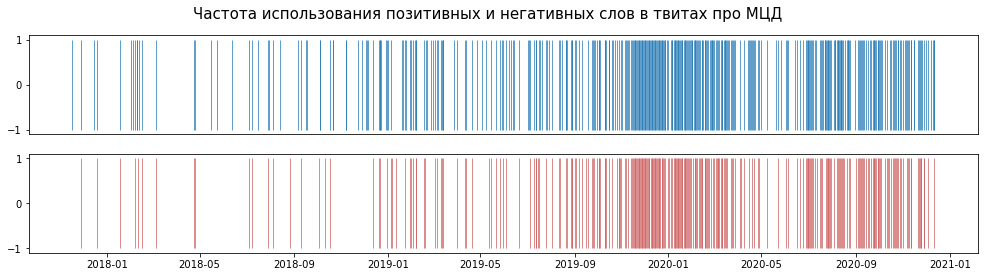

In [25]:
positive = tweets_words.groupby(['tag', 'date']).agg('count').loc['PSTV', 'word']
negative = tweets_words.groupby(['tag', 'date']).agg('count').loc['NGTV', 'word']

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(17, 4), sharex=True)
ax1.vlines(positive.index,
           ymin=-1, ymax=1, linewidth=0.7)
ax1.tick_params(bottom=False)
ax2.vlines(negative.index,
           ymin=-1, ymax=1, color='indianred', linewidth=0.7)

f.suptitle('Частота использования позитивных и негативных слов в твитах про МЦД', fontsize=15)
# plt.savefig('intensity_mcd.png', dpi=300)
plt.show()

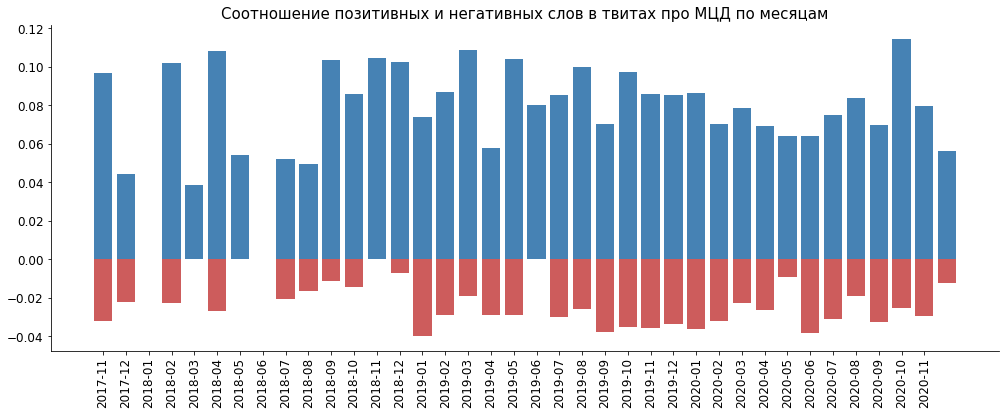

In [38]:
positive = tweets_words.groupby(['tag', 'yy_mm']).agg('count').loc['PSTV', 'word'] * weights.loc['PSTV']
negative = tweets_words.groupby(['tag', 'yy_mm']).agg('count').loc['NGTV', 'word'] * weights.loc['NGTV']
total_words_by_month = tweets_words.groupby('yy_mm').agg('count').word

date_axis = pd.date_range(tweets_words.date.min(), tweets_words.date.max(), freq='M')
date_axis = pd.Series(date_axis).apply(lambda x: dt.datetime.strftime(x, '%Y-%m'))

for date in date_axis:
    if date not in positive:
        positive = positive.append(pd.Series('0', index=[date]))
    elif date not in negative:
        negative = negative.append(pd.Series('0', index=[date]))
        
f, ax = plt.subplots(figsize=(17, 6))
plt.bar(positive.sort_index().index, positive.sort_index().astype('int32') / total_words_by_month, color='steelblue')
plt.bar(negative.sort_index().index, (negative.sort_index().astype('int32') / total_words_by_month) * (-1), color='indianred')
ax.set_xticks(date_axis)
ax.set_xticklabels(date_axis, fontsize=12)
ax.tick_params(axis='x', rotation=90)
ax.tick_params(axis='y', labelsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.title('Соотношение позитивных и негативных слов в твитах про МЦД по месяцам', fontsize=15)
# plt.savefig('shares_mcd.png', dpi=300, bbox_inches='tight')
plt.show()